# SMDM Project

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import scipy.stats as stats 
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
from statsmodels.stats.weightstats import ztest

## Problem 1

In [5]:
customer_data = pd.read_excel('Wholesale customers data-1.xlsx', sheet_name=1)

In [8]:
customer_data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [12]:
customer_data.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [48]:
customer_data.isnull()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000173C3D92F08>,
      dtype=object)

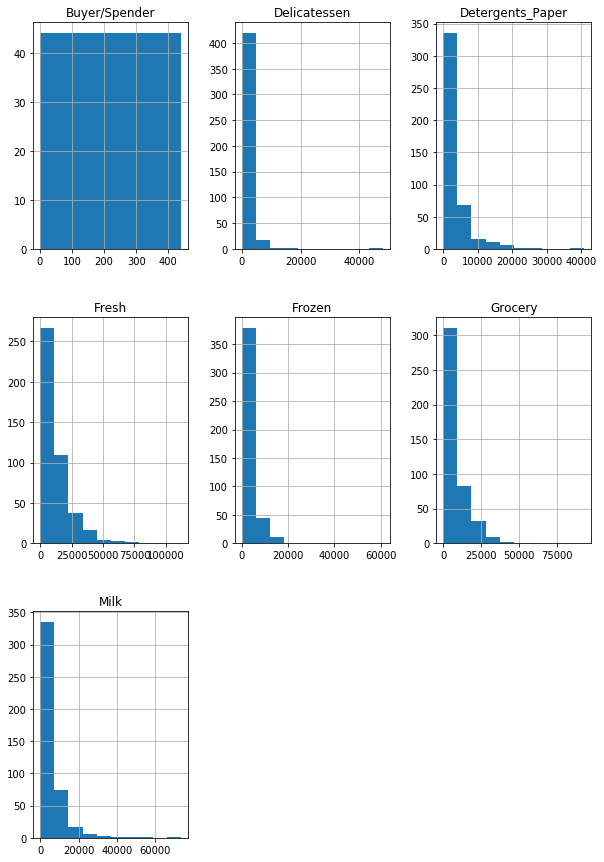

In [15]:
customer_data.hist(figsize = (10,15))

1.1 

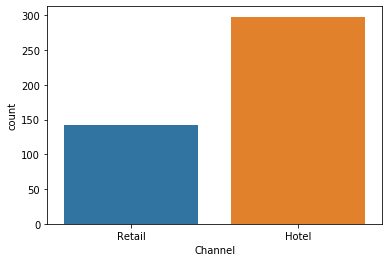

In [17]:
sns.countplot(customer_data['Channel'])

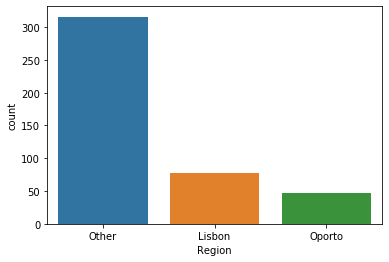

In [19]:
sns.countplot(customer_data['Region'])

* Hotel and Other is the Channel and Region which spend more respectively
* Retail and Oporto is the Channel and Region which spend less respectively

1.2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000173C66C78C8>,
      dtype=object)

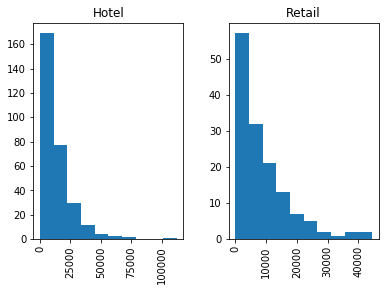

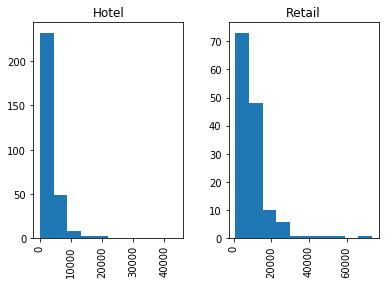

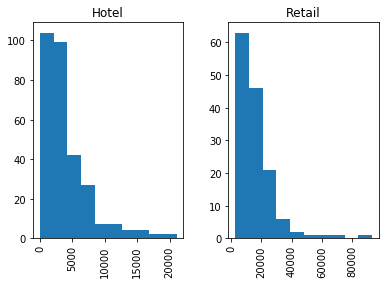

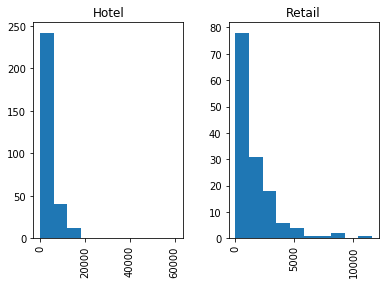

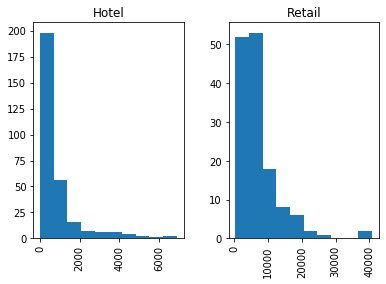

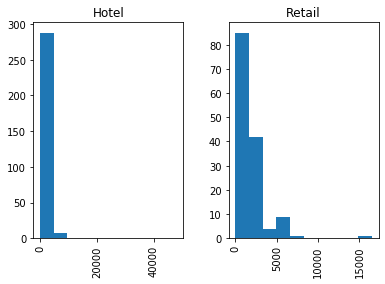

In [21]:
customer_data.hist(by='Channel',column = 'Fresh')
customer_data.hist(by='Channel',column = 'Milk')
customer_data.hist(by='Channel',column = 'Grocery')
customer_data.hist(by='Channel',column = 'Frozen')
customer_data.hist(by='Channel',column = 'Detergents_Paper')
customer_data.hist(by='Channel',column = 'Delicatessen')

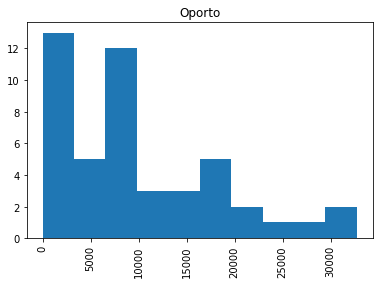

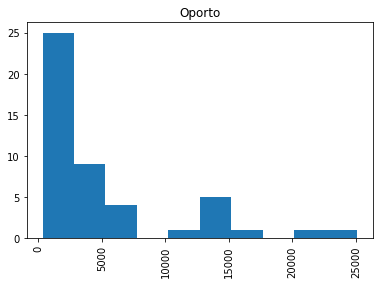

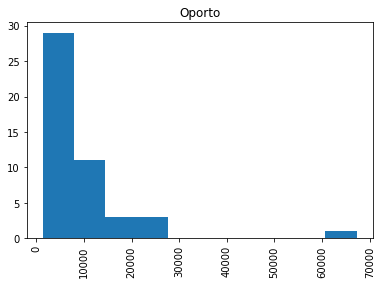

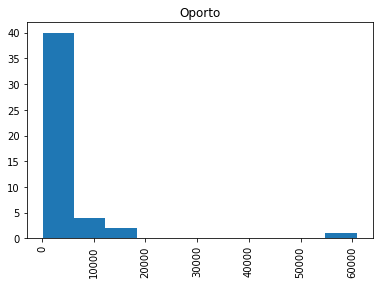

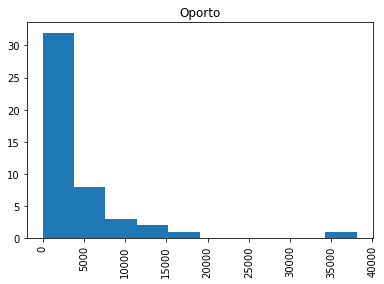

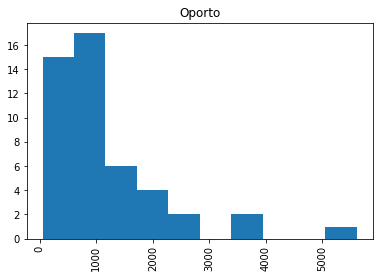

In [23]:
oporto = customer_data[customer_data['Region'].str.contains('Oporto')]
oporto.hist(by = 'Region',column = 'Fresh')
oporto.hist(by = 'Region',column = 'Milk')
oporto.hist(by = 'Region',column = 'Grocery')
oporto.hist(by = 'Region',column = 'Frozen')
oporto.hist(by = 'Region',column = 'Detergents_Paper')
oporto.hist(by = 'Region',column = 'Delicatessen')

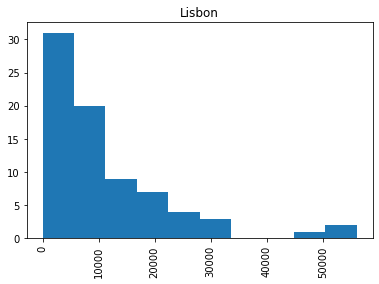

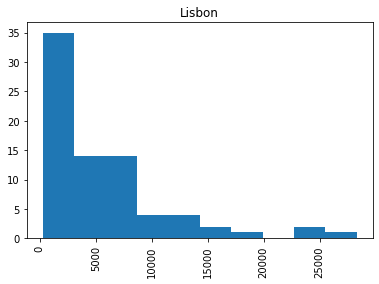

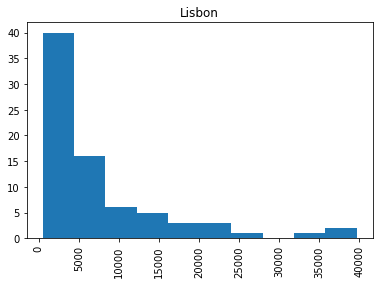

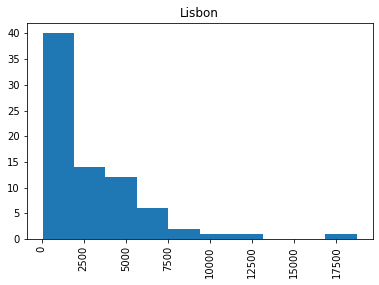

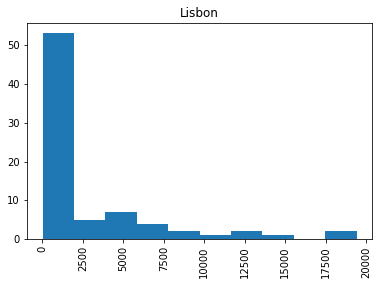

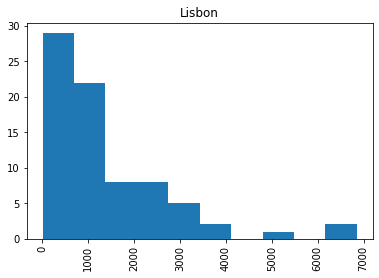

In [25]:
lisbon = customer_data[customer_data['Region'].str.contains('Lisbon')]
lisbon.hist(by = 'Region',column = 'Fresh')
lisbon.hist(by = 'Region',column = 'Milk')
lisbon.hist(by = 'Region',column = 'Grocery')
lisbon.hist(by = 'Region',column = 'Frozen')
lisbon.hist(by = 'Region',column = 'Detergents_Paper')
lisbon.hist(by = 'Region',column = 'Delicatessen')

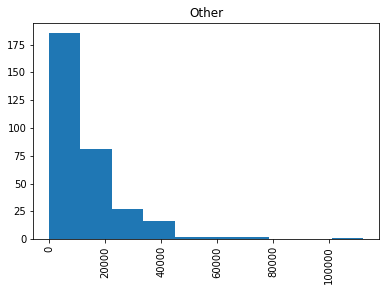

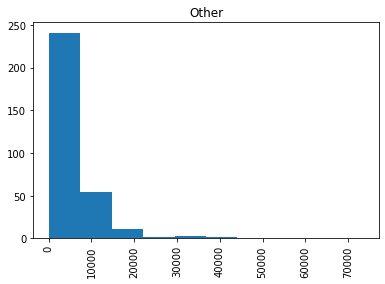

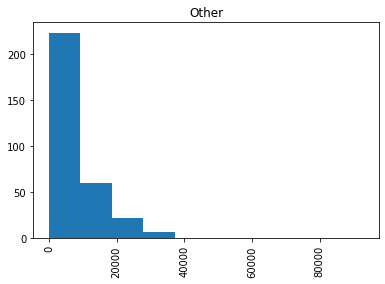

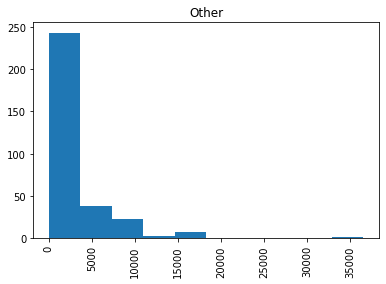

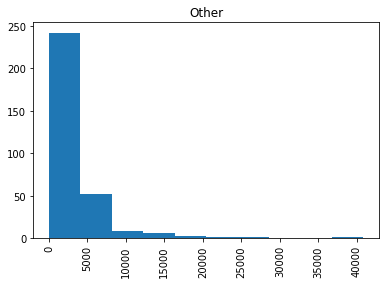

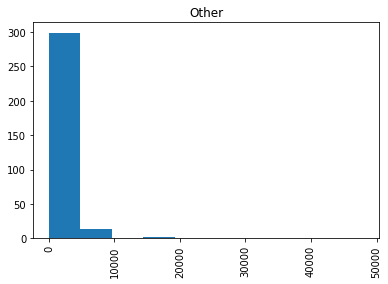

In [27]:
other = customer_data[customer_data['Region'].str.contains('Other')]
other.hist(by = 'Region',column = 'Fresh')
other.hist(by = 'Region',column = 'Milk')
other.hist(by = 'Region',column = 'Grocery')
other.hist(by = 'Region',column = 'Frozen')
other.hist(by = 'Region',column = 'Detergents_Paper')
other.hist(by = 'Region',column = 'Delicatessen')

1.2 

* Yes, they are all highly skewed to the right although in some cases customers buy products which are expensive

1.3

In [28]:
customer_data.mean()

Buyer/Spender         220.500000
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [30]:
customer_data.std()

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [34]:
stats.variation(customer_data['Fresh'])

1.0527196084948243

In [36]:
stats.variation(customer_data['Milk'])

1.27185083074245

In [37]:
stats.variation(customer_data['Grocery'])

1.1938154477492668

In [38]:
stats.variation(customer_data['Frozen'])

1.578535529860776

In [39]:
stats.variation(customer_data['Detergents_Paper'])

1.6527657881041735

In [41]:
stats.variation(customer_data['Delicatessen'])

1.8473041039189302

* Taking into account the Standard Deviation and Coeficent of Variation of all 6 items, 
Delicatessen shows the most inconsistent behaviour and Fresh shows the least inconsistent behaviour 

1.4

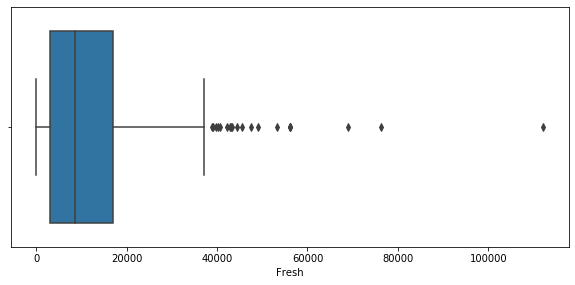

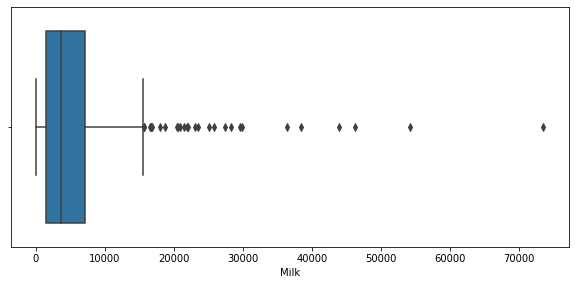

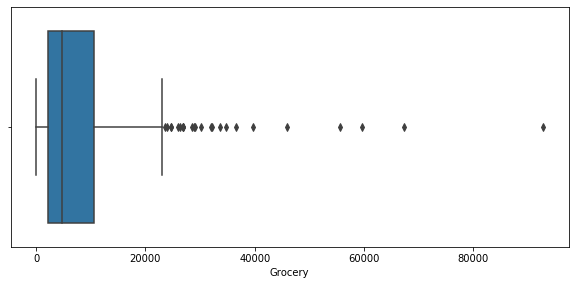

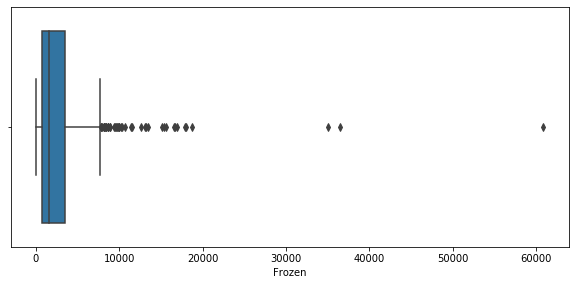

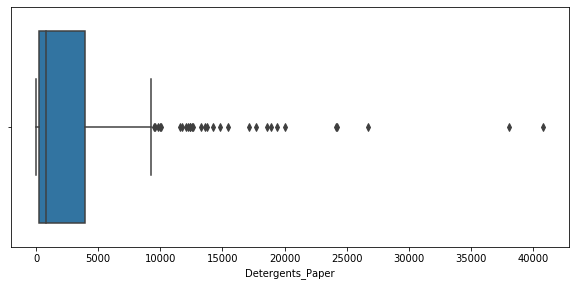

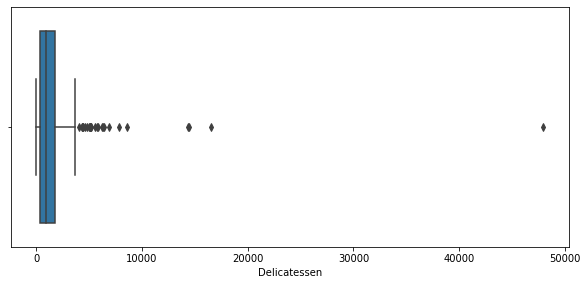

In [43]:
plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
sns.boxplot(x = customer_data.Fresh)

plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
sns.boxplot(x = customer_data.Milk)

plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
sns.boxplot(x = customer_data.Grocery)

plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
sns.boxplot(x = customer_data.Frozen)

plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
sns.boxplot(x = customer_data.Detergents_Paper)

plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
sns.boxplot(x = customer_data.Delicatessen)


* All six items have numerous outliers in the data

## Problem 2

In [2]:
survey_data = pd.read_csv('Survey-1.csv')

In [46]:
survey_data.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [47]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
ID                   62 non-null int64
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [50]:
survey_data.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [51]:
survey_data.isnull()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,False,False,False,False,False,False,False,False,False,False,False,False,False,False
58,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Part 1
2.1

In [52]:
pd.crosstab(survey_data['Gender'],survey_data['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [53]:
pd.crosstab(survey_data['Gender'],survey_data['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [54]:
pd.crosstab(survey_data['Gender'],survey_data['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [55]:
pd.crosstab(survey_data['Gender'],survey_data['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [56]:
pd.value_counts(survey_data['Gender'])

Female    33
Male      29
Name: Gender, dtype: int64

## 2.2

2.2.1

In [8]:
def probability(outcomes, sample_space):
    probability = (outcomes / sample_space) * 100
    return round(probability, 1)

total = 62 
male = 29
female = 33
Accounting_male = 4 
Accounting_total = 7 
Accounting_female = 3
CIS_male = 1
CIS_total = 4
CIS_female = 3
Economics_male = 4
Economics_total = 11
economics_female = 7
mgt_male = 6
mgt_female = 4
mgt_total = 10
other_male = 4
other_female = 3
other_total = 7
retail_male = 5
retail_female = 9
retail_total = 14
undecided_male = 3
undecided_female = 0
undecided_total = 3

In [64]:
male_probability = probability(male, total)
male_probability

46.8

In [10]:
female_probability = probability(female, total)
female_probability

53.2

2.2.2

Probability that a student chosen at random is an Accounting Major given that it's a male  

In [12]:
probability(Accounting_male, male)

13.8

Probability that an Accounting Major chosen at random is a male 

In [14]:
probability(Accounting_male, Accounting_total)

57.1

Probability that an Accounting Major chosen at random is a female

In [18]:
probability(Accounting_female, Accounting_total)

42.9

Probability that a student chosen at random is a CIS Major given that it's a male

In [20]:
probability(CIS_male, male)

3.4

Probability that a CIS Major chosen at random is a male

In [22]:
probability(CIS_male, CIS_total )

25.0

Probability that a student chosen at random is a CIS Major given that it's a female

In [24]:
probability(CIS_female, female)

9.1

Probability that a CIS Major chosen at random is a female

In [26]:
probability(CIS_female, CIS_total)

75.0

Probability that a student chosen at random is an Economics/Finance Major given that it's a male

In [28]:
probability(Economics_male, male)

13.8

Probability that an Economics/Finance Major chosen at random is a male

In [30]:
probability(Economics_male, Economics_total)

36.4

Probability that a student chosen at random is an Economics/Finance Major given that it's a female

In [32]:
probability(economics_female, female)

21.2

Probability that an Economics/Finance Major chosen at random is a female

In [34]:
probability(economics_female, Economics_total)

63.6

Probability that a student chosen at random is an International Business Major given that it's a male

In [37]:
probability(IB_male, male)

6.9

Probability that a student chosen at random is an International Business Major given that it's a female

In [41]:
probability(IB_female, female)

12.1


Probability that an International Business major chosen at random is a female

In [43]:
probability(IB_female, IB_total)

66.7

Probability that a student chosen at random is a Management Major given that it's a male

In [44]:
probability(mgt_male, male)

20.7

Probability that a Management major chosen at random is a male

In [45]:
probability(mgt_male, mgt_total)

60.0

Probability that a student chosen at random is a Management Major given that it's a female

In [46]:
probability(mgt_female, female)

12.1

Probability that a Management major chosen at random is a female

In [47]:
probability(mgt_female, mgt_total)

40.0

Probability that a student chosen at random is an Other Major given that it's a male

In [48]:
probability(other_male, male)

13.8

Probability that an Other major chosen at random is a male

In [49]:
probability(other_male, other_total)

57.1

Probability that a student chosen at random is an Other Major given that it's a female

In [9]:
probability(other_female, female)

9.1

Probability that an Other major chosen at random is a female

In [51]:
probability(other_female, other_total)

42.9

Probability that a student chosen at random is a Retailing/Marketing Major given that it's a male

In [53]:
probability(retail_male, male)

17.2

Probability that a student chosen at random is a Retailing/Marketing Major given that it's a female

In [56]:
probability(retail_female, female)

27.3

Probability that an Undecided major chosen at random is a male

In [68]:
probability(undecided_male, undecided_total)

100.0

Probability that an Undecided major chosen at random is a female

In [70]:
probability(undecided_female, undecided_total)

0.0

2.2.3

In [72]:
intent_to_grad_male = 17
intent_to_grad_female = 11
intent_to_grad_total = 28
no_intent_to_grad_male = 3
no_intent_to_grad_female = 9
no_intent_to_grad_total = 12
undecided_intent_male = 9
undecided_intent_female = 13
undecided_intent_total = 22

Probability that a male student chosen at random has intent to graduate

In [75]:
probability(intent_to_grad_male, intent_to_grad_total)

60.7

Probability that a female student chosen at random has intent to graduate

In [76]:
probability(intent_to_grad_female, female)

33.3

Probability that a male student chosen at random has no intent to graduate

In [79]:
probability(no_intent_to_grad_male, male)

10.3

Probability that a student chosen at random is a male given that he has no intent to graduate

In [82]:
probability(no_intent_to_grad_male, no_intent_to_grad_total)

25.0

Probability that a female student chosen at random has no intent to graduate

In [83]:
probability(no_intent_to_grad_female, female)

27.3

Probability that a male student chosen at random has undecided intent to graduate

In [86]:
probability(undecided_intent_male, male)

31.0

Probability that a student chosen at random is a male given that he has undecided intent to graduate

In [94]:
probability(undecided_intent_male, undecided_intent_total)

40.9

Probability that a female student chosen at random has undecided intent to graduate

In [88]:
probability(undecided_intent_female, female)

39.4

2.2.4

In [114]:
full_time_male = 7
full_time_female = 3
full_time_total = 10
part_time_male = 19
part_time_female = 24
part_time_total = 43
unemployed_male = 3
unemployed_female = 6
unemployed_total = 9

Probability that a male student chosen at random is a full time employee

In [96]:
probability(full_time_male, male)

24.1

Probability that a female student chosen at random is a full time employee

In [98]:
probability(full_time_female, female)

9.1

Probability that a full time employee chosen at random is a female

In [99]:
probability(full_time_female, full_time_total)

30.0

Probability that a male student chosen at random is a part time employee

In [112]:
probability(part_time_male, male)

65.5

Probability that a part time employee chosen at random is a male

In [115]:
probability(part_time_male, part_time_total)

44.2

Probability that a part time employee chosen at random is a female

In [117]:
probability(part_time_female, part_time_total)

55.8

Probability that a male student chosen at random is unemployed 

In [105]:
probability(unemployed_male, male)

10.3

Probability that a female student chosen at random is unemployed

In [109]:
probability(unemployed_female, female)

18.2

2.2.5

In [118]:
desktop_male = 3
desktop_female = 2
desktop_total = 5
laptop_male = 26
laptop_female = 29
laptop_total = 55
tablet_male = 0
tablet_female = 2
tablet_total = 2

Probability that a male student chosen at random has a desktop

In [119]:
probability(desktop_male, male)

10.3

Probability that a female student chosen at random has a desktop

In [121]:
probability(desktop_female, female)

6.1

Probability that a male student chosen at random has a laptop

In [123]:
probability(laptop_male, male)

89.7

Probability that a student chosen at random is a male given that he has a laptop

In [125]:
probability(laptop_male, laptop_total)

47.3

Probability that a student chosen at random is a female given that she has a laptop

In [127]:
probability(laptop_female, laptop_total)

52.7

Probability that a male student chosen at random has a tablet

In [128]:
probability(tablet_male, male)

0.0

Probability that a female student chosen at random has a tablet

In [130]:
probability(tablet_female, female)

6.1

Probability that a student chosen at random is a female given that she has a tablet

In [131]:
probability(tablet_female, tablet_total)

100.0

## Part 2

2.4

In [135]:
stats.skew(survey_data.Salary)

0.5216766008645851

In [136]:
stats.skew(survey_data.Spending)

1.5472850312929523

In [4]:
stats.skew(survey_data['Text Messages'])

1.2642446834439687

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002869E7E5FC8>,
      dtype=object)

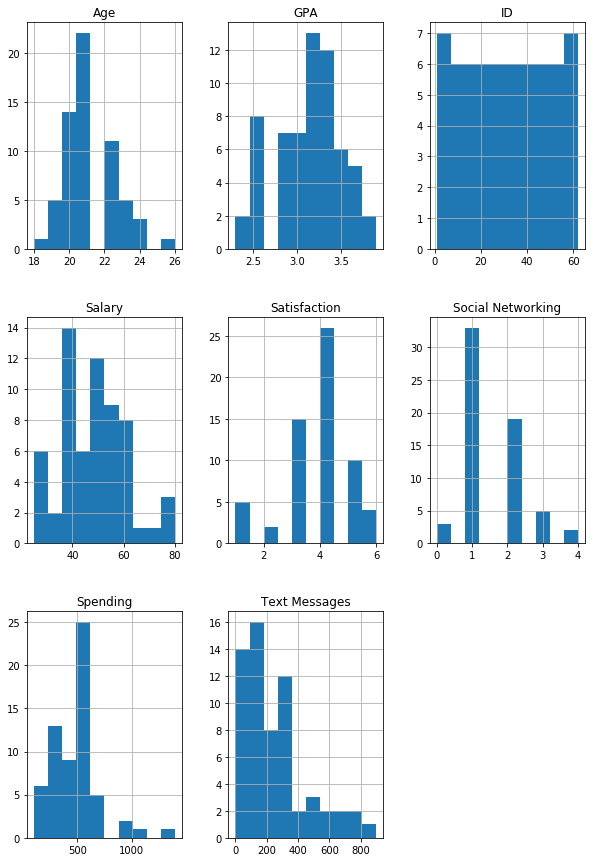

In [12]:
survey_data.hist(figsize=(10,15))

* The Histogram for salary shows a nearly bell shaped curve and the skewness is close to 0 and thus can say that salary is normally distributed 
* The Histogram for Spending is not bell shaped and is right skewed this is not normally distributed 
* similarly the Histogram for Text messages is also not bell shaped and is right skewed, thus not normally distributed

## Problem 3

In [4]:
shingles_data = pd.read_csv('A & B shingles-1.csv')

In [17]:
B_shingles_data = pd.read_csv('B shingles -1.csv')

In [18]:
shingles_data.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [19]:
B_shingles_data.head()

,Unnamed: 0,B
0,NaN,0.14
1,NaN,0.15
2,NaN,0.31
3,NaN,0.16
4,NaN,0.37


In [20]:
shingles_data.info()
B_shingles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
A    36 non-null float64
B    31 non-null float64
dtypes: float64(2)
memory usage: 704.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
Unnamed: 0    0 non-null float64
B             31 non-null float64
dtypes: float64(2)
memory usage: 624.0 bytes


In [22]:
shingles_data.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [23]:
B_shingles_data.describe()

,Unnamed: 0,B
count,0.0,31.000000
mean,NaN,0.273548
std,NaN,0.137296
min,NaN,0.100000
25%,NaN,0.160000
50%,NaN,0.230000
75%,NaN,0.400000
max,NaN,0.580000


In [33]:
shingles_data.mean()

A    0.316667
B    0.273548
dtype: float64

* Null hypothesis : mean => 0.35  
* Alternate hypothesis : mean < 0.35
* one tailed Z Test since size is greater than 30

3.2

In [32]:
t_statistic, p_value = ztest(shingles_data['A'], value=0.32, alternative='two-sided')
t_statistic, p_value

(-0.1473504625338288, 0.8828554037914303)

0.88 > 0.05
* since p_value is greater than 0.05 (level of significance) we fail to reject the Null Hypothesis 

3.3 

* Null hypothesis : mean => 0.35
* Alternate hypothesis : mean < 0.35
* one tailed Z Test since size is greater than 30

3.4

In [37]:
t_statistic, p_value = ztest(B_shingles_data['B'], value=0.27)
t_statistic, p_value

(0.14389723365816726, 0.8855816201749854)

0.88 > 0.05

* since p_value is greater than 0.05 (level of significance) we fail to reject the Null Hypothesis

3.5

* Null hypothesis : meanA = meanB
* Alternate hypothesis : meanA not= meanB
* 2 sample T test for comparing means of different sizes 

In [38]:
t_statistic, p_value = ttest_ind(shingles_data['A'], B_shingles_data['B'])
t_statistic, p_value 

(1.289628271966112, 0.2017496571835328)

0.20 > 0.05

* since p_value is greater than 0.05 (level of significance) we fail to reject the Null Hypothesis
* the assumption to be made is that the data is random, independent and normally distributed


3.6
* The assumption is that the population is normally distributed 

3.7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000239415AF108>,
      dtype=object)

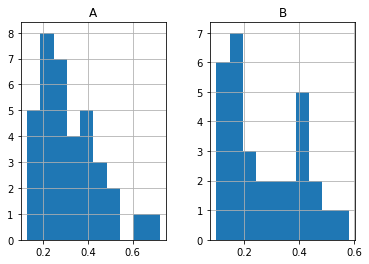

In [6]:
shingles_data.hist()

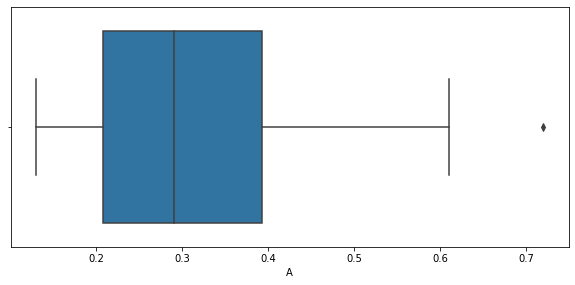

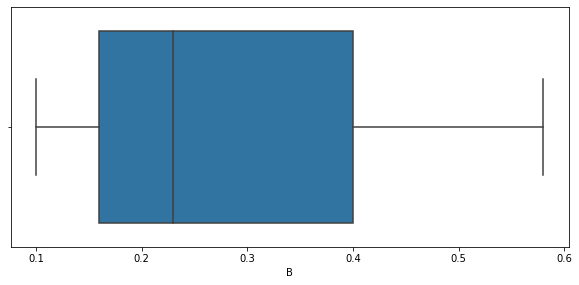

In [48]:
plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
sns.boxplot(shingles_data['A'])

plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
sns.boxplot(shingles_data['B'])

3.8

yes, it is vaild, in this case the data is not normally distributed thus leading to failure to reject Null hypothesis. If a larger size is given the data is more likely to be normally distributed which may help in rejecting the Null hypothesis